In [53]:
# Imports and setup
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

root = Path.cwd().parent


In [54]:
# Load datasets
demand_df = pd.read_csv(root/'results'/'demand.csv').groupby('Date', as_index=False)['Sales'].sum()
shipment_decisions_df = pd.read_csv(root/'results'/'shipment_decisions.csv').groupby('Date', as_index=False)['Shipment'].sum()
inventory_decisions_df = pd.read_csv(root/'results'/'inventory_decisions.csv').groupby('Date', as_index=False)['Inventory'].sum()
shortage_decisions_df = pd.read_csv(root/'results'/'shortage_decisions.csv').groupby('Date', as_index=False)['Shortage'].sum()
holding_costs_df = pd.read_csv(root/'results'/'holding_costs.csv').groupby('Date', as_index=False)['HoldingCost'].sum()
shortage_weights_df = pd.read_csv(root/'results'/'shortage_weights.csv').groupby('Date', as_index=False)['ShortageWeight'].sum()


In [55]:
# Compute actual sales from demand and shortage decisions
sales_df = demand_df.merge(shortage_decisions_df, on='Date', how='left')
sales_df['RealSales'] = sales_df['Sales'] - sales_df['Shortage']
sales_df = sales_df[['Date', 'RealSales']]
sales_df.rename(columns={'RealSales': 'Sales'}, inplace=True)


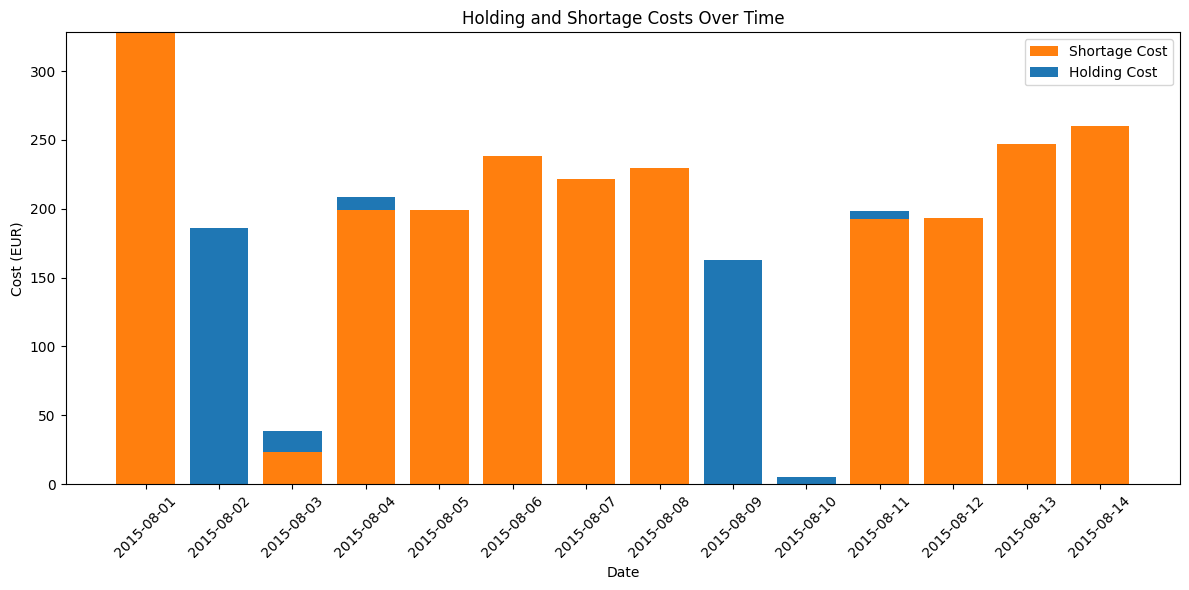

In [ ]:
# Merge holding costs and shortage weights on Date
costs_df = pd.merge(holding_costs_df, shortage_weights_df, on='Date', how='inner')

dates = costs_df['Date']
holding_cost = costs_df['HoldingCost']
shortage_weight = costs_df['ShortageWeight']

plt.figure(figsize=(12, 6))

# Stacked bars: holding cost bottom, shortage weight top
plt.bar(dates, shortage_weight, label='Shortage Cost', color='#ff7f0e')
plt.bar(dates, holding_cost, bottom=shortage_weight, label='Holding Cost', color='#1f77b4')

plt.xlabel('Date')
plt.ylabel("Cost ('000 EUR)")
plt.title('Holding and Shortage Costs Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


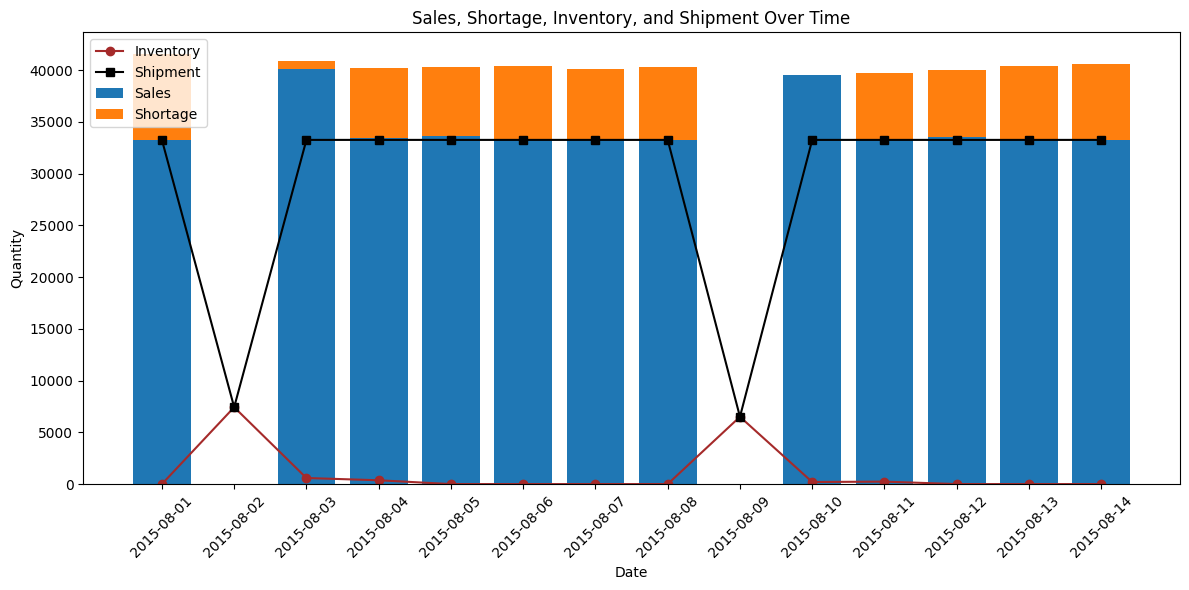

In [57]:
# Merge shortage and sales on Date
plot_df = pd.merge(shortage_decisions_df, sales_df, on='Date', how='inner')

dates = plot_df['Date']
shortage = plot_df['Shortage']
sales = plot_df['Sales']

# Align inventory and shipment data by Date
inventory_plot_df = pd.merge(plot_df[['Date']], inventory_decisions_df, on='Date', how='left')
inventory = inventory_plot_df['Inventory']

shipment_plot_df = pd.merge(plot_df[['Date']], shipment_decisions_df, on='Date', how='left')
shipment = shipment_plot_df['Shipment']

plt.figure(figsize=(12, 6))

# Stacked bars: sales (blue bottom), shortage (orange top)
plt.bar(dates, sales, label='Sales', color='#1f77b4')
plt.bar(dates, shortage, bottom=sales, label='Shortage', color='#ff7f0e')

# Inventory as a green line with circle markers
plt.plot(dates, inventory, label='Inventory', color='brown', marker='o')

# Shipment as a purple line with square markers
plt.plot(dates, shipment, label='Shipment', color='black', marker='s')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Sales, Shortage, Inventory, and Shipment Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
